<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_Lab%E2%84%964/MatveiClaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Описание датасета

species - вид рабы

length - длина рыбы

weight - масса рыбы

w_l_ratio( Weight / Length) - коэффициент отношения массы к длине рыбы



In [296]:
from google.colab import drive
drive.mount('/content/drive/')
sns.set()
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/fish_data.csv")
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


# Анализ и нормализация данных

In [297]:
data.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [298]:
data.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [299]:
vals = data['species'].unique()
vals

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [300]:
len(vals) # всего 9 видов рыб в датасете

9

In [301]:
# функция, преобразующая категориальные значения в численные
def rename(name):
  for col in [name]:
    data[name] = data[name].replace(list(data[name].unique()), list(range(len(list(data[name].unique())))))

rename('species')


<ipython-input-301-abba8d61f472>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[name] = data[name].replace(list(data[name].unique()), list(range(len(list(data[name].unique())))))


In [302]:
data.head()

,species,length,weight,w_l_ratio
0,0,10.66,3.45,0.32
1,0,6.91,3.27,0.47
2,0,8.38,3.46,0.41
3,0,7.57,3.36,0.44
4,0,10.83,3.38,0.31


In [303]:
# нормализация данных

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(data)
data = pd.DataFrame(normalized_df, columns=data.columns)
data.head(2)


,species,length,weight,w_l_ratio
0,0.0,0.156364,0.330189,0.428571
1,0.0,0.020000,0.287736,0.696429


# Кластеризация

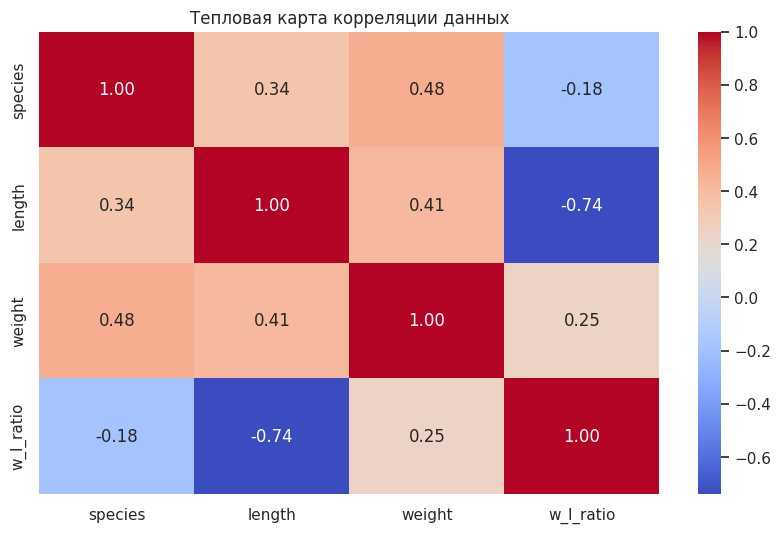

In [305]:
# Будет кластеризовать по species - целевая переменная

# Тепловая карта

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции данных')
plt.show()

In [306]:
data = data.head(4000)

In [307]:
X = data.drop(['species'], axis = 1)
y = data['species']

# K-Means

In [308]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans

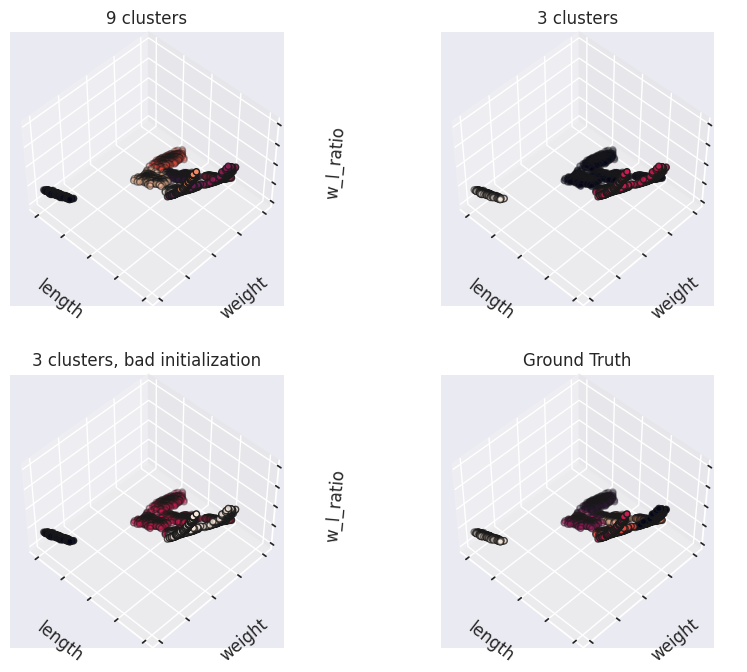

In [309]:
estimators = [
    ("k_means_9", KMeans(n_clusters=9)),
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["9 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["length"], X["weight"], X["w_l_ratio"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("length")
    ax.set_ylabel("weight")
    ax.set_zlabel("w_l_ratio")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2),(vals[3], 3),(vals[4], 4),(vals[5], 5),(vals[6], 6),(vals[7], 7),(vals[8], 8)]:
    ds = data[data["species"]==name]
    ax.text3D(
        ds["length"].mean(),
        ds["weight"].mean(),
        ds["w_l_ratio"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["length"], X["weight"], X["w_l_ratio"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("length")
ax.set_ylabel("weight")
ax.set_zlabel("w_l_ratio")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

# Метрики


In [310]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [311]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

In [312]:
best_metric

[19,
 0.4751637682166564,
 0.5548633497721743,
 array([[0.40776154, 0.25117925, 0.17392635],
        [0.11202918, 0.29620894, 0.48401675],
        [0.93111912, 0.97228774, 0.20335591],
        [0.13961543, 0.59542555, 0.65904419],
        [0.65195041, 0.11909305, 0.04496753],
        [0.51222903, 0.41857344, 0.19169298],
        [0.19678081, 0.13411564, 0.25613497],
        [0.01986207, 0.28614997, 0.70212438],
        [0.28714439, 0.45782464, 0.35886855],
        [0.10049906, 0.59656799, 0.75480296],
        [0.47557003, 0.27658103, 0.15379246],
        [0.84619962, 0.95428157, 0.22402597],
        [0.06127273, 0.59183881, 0.87207512],
        [0.59771123, 0.42834813, 0.15994398],
        [0.19134013, 0.45402669, 0.47116725],
        [0.27429875, 0.13958565, 0.19705882],
        [0.65625436, 0.21437824, 0.07429682],
        [0.18994747, 0.59575472, 0.56329365],
        [0.05573186, 0.2824352 , 0.59289322]])]

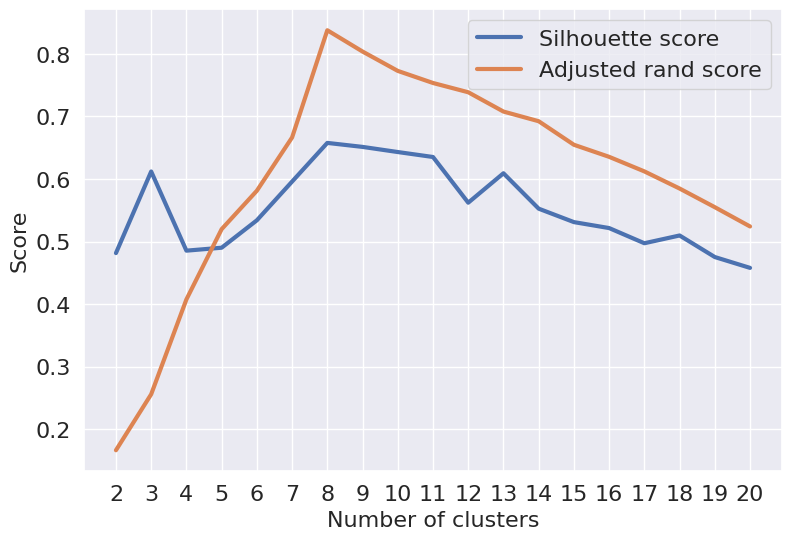

In [313]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

# Иерархическая кластеризация

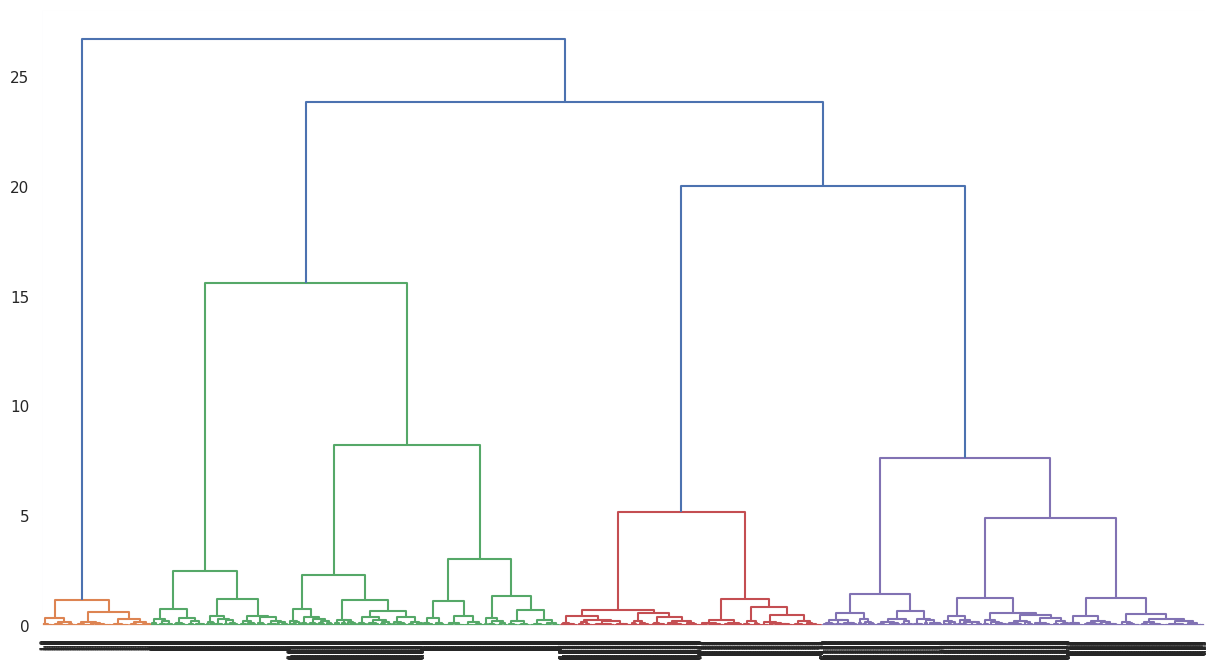

In [314]:
from scipy.cluster.hierarchy import linkage, dendrogram
samples = data.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')


plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

### **DBSCAN**

In [315]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [316]:
mins = X.shape[1]

['y', 'b', 'g', 'r', 'orange', 'lightblue', 'pink', 'purple', 'brown']


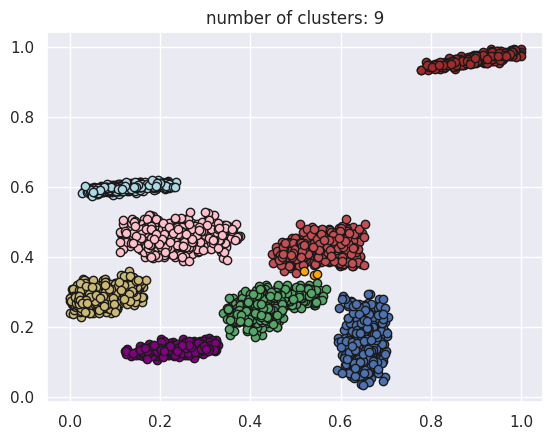

In [361]:
db = DBSCAN(eps=0.025, min_samples=3).fit(X)   # eps=0.025, min_samples=3
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r','orange','lightblue','pink','purple','brown']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["length"], xy["weight"], 'o', markerfacecolor=col,  #Previous_Scores
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["length"], xy["weight"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

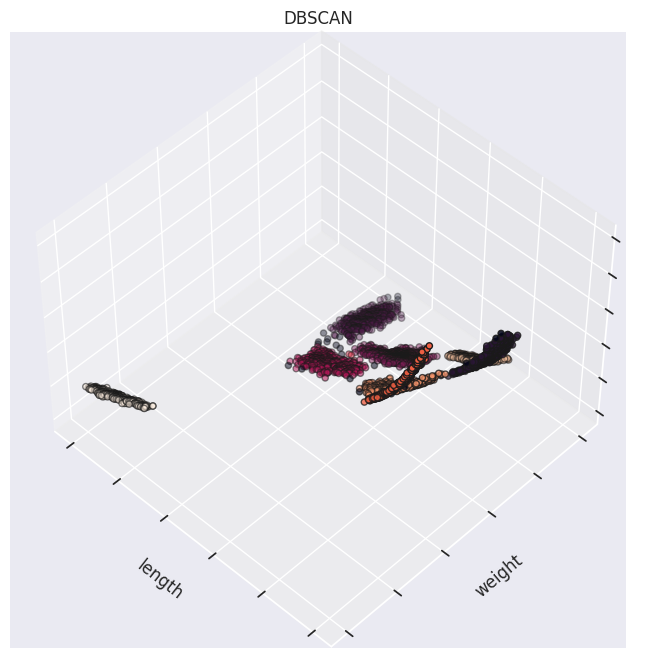

In [362]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["length"], X["weight"], X["w_l_ratio"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("length")
ax.set_ylabel("weight")
ax.set_zlabel("w_l_ratio")
ax.set_title("DBSCAN")

plt.show()

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

In [363]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)

print("Adjusted Rand Index: %0.2f" % ari)


Silhouette Coefficient:0.56
Adjusted Rand Index: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров (Силуэт)

У нас хорошее кластерное восстановление (ARI)